# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="bitcoin", language="en")
btc_articles

{'status': 'ok',
 'totalResults': 3476,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Romain Dillet',
   'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
   'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
   'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2020-10-21T13:28:15Z',
   'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'},
  {'source': {'id': 't

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="ethereum", language="en")
eth_articles

{'status': 'ok',
 'totalResults': 1161,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Romain Dillet',
   'title': 'PayPal to let you buy and sell cryptocurrencies in the US',
   'description': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon. PayPal plans to support Bitcoin, Ethereum, Bitcoin Cash and Lite…',
   'url': 'http://techcrunch.com/2020/10/21/paypal-to-let-you-buy-and-sell-cryptocurrencies-in-the-us/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/07/GettyImages-887657568.jpg?w=600',
   'publishedAt': '2020-10-21T13:28:15Z',
   'content': 'PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.\r\nPay… [+2069 chars]'},
  {'source': {'id': 't

In [6]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
btc_df = btc_df[cols]

btc_df.head()


,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
2,-0.7184,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...
3,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...
4,0.2732,0.071,0.831,0.098,Cryptocurrencies like bitcoin are a fun way to...


In [7]:
# Create the ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
eth_df = eth_df[cols]

eth_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...
1,0.0000,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...
2,-0.2960,0.061,0.939,0.000,"September\r\n30, 2020\r\n8 min read\r\nOpinion..."
3,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...
4,-0.4215,0.132,0.783,0.085,Portions of the global economy melted down in ...


In [8]:
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.152840,0.039500,0.899450,0.061050
std,0.440975,0.068538,0.066954,0.055088
min,-0.718400,0.000000,0.797000,0.000000
25%,0.000000,0.000000,0.839500,0.000000
50%,0.250000,0.000000,0.910000,0.065500
75%,0.507000,0.044000,0.928250,0.090000
max,0.726900,0.203000,1.000000,0.186000


In [9]:
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,17.000000,17.000000,17.000000,17.000000
mean,0.156794,0.013882,0.934824,0.051294
std,0.308951,0.035105,0.069378,0.057579
min,-0.421500,0.000000,0.783000,0.000000
25%,0.000000,0.000000,0.887000,0.000000
50%,0.000000,0.000000,0.939000,0.046000
75%,0.401900,0.000000,1.000000,0.085000
max,0.680800,0.132000,1.000000,0.162000


### Questions:

Q: Which coin had the highest mean positive score?

A: BITCOIN

Q: Which coin had the highest compound score?

A: BITCOIN

Q. Which coin had the highest positive score?

A: BITCOIN

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
sw_addon = {'crypto', 'cryptocurrency'}

In [12]:
# Complete the tokenizer function
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    """Tokenizes text."""
    
    # Remove punctuations
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)

    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens



In [13]:
# Create a new tokens column for bitcoin
btc_df["tokens"] = btc_df["text"].apply(tokenizer)
btc_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[paypal, ha, partnered, company, paxos, launch..."
1,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[paypal, rolling, support, later, yearillustra..."
2,-0.7184,0.154,0.846,0.000,The Financial Crimes Enforcement Network (FinC...,"[financial, crimes, enforcement, network, finc..."
3,0.2500,0.000,0.935,0.065,Image copyrightChandler GuoImage caption\r\n C...,"[image, copyrightchandler, guoimage, caption, ..."
4,0.2732,0.071,0.831,0.098,Cryptocurrencies like bitcoin are a fun way to...,"[cryptocurrencies, like, bitcoin, fun, way, sk..."


In [14]:
# Create a new tokens column for ethereum
eth_df["tokens"] = eth_df["text"].apply(tokenizer)
eth_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,PayPal has partnered with cryptocurrency compa...,"[paypal, ha, partnered, company, paxos, launch..."
1,0.0000,0.000,1.000,0.000,Breitling is partnering with Arianee to issue ...,"[breitling, partnering, arianee, issue, new, k..."
2,-0.2960,0.061,0.939,0.000,"September\r\n30, 2020\r\n8 min read\r\nOpinion...","[september, min, readopinions, expressed, entr..."
3,0.6808,0.000,0.838,0.162,PayPal is rolling out cryptocurrency support l...,"[paypal, rolling, support, later, yearillustra..."
4,-0.4215,0.132,0.783,0.085,Portions of the global economy melted down in ...,"[portions, global, economy, melted, emerging, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2

def btc_bigram_counter(btc_articles): 
    # Combine all Bitcoin articles into one large string
    btc_big_string = ' '.join(btc_df['text'])
    btc_processed = tokenizer(btc_big_string)
    btc_bigrams = ngrams(btc_processed, n=2)
    btc_top_20 = dict(Counter(btc_bigrams).most_common(20))
    return btc_top_20 

In [17]:
btc_bigram_counter(btc_articles)

{('satoshi', 'nakaboto'): 10,
 ('char', 'reuters'): 6,
 ('bitcoin', 'btc'): 6,
 ('char', 'robot'): 5,
 ('robot', 'colleague'): 5,
 ('colleague', 'satoshi'): 5,
 ('nakaboto', 'writes'): 5,
 ('writes', 'bitcoin'): 5,
 ('every', 'fucking'): 5,
 ('fucking', 'daywelcome'): 5,
 ('daywelcome', 'another'): 5,
 ('another', 'edition'): 5,
 ('edition', 'bitcoin'): 5,
 ('bitcoin', 'today'): 5,
 ('today', 'satoshi'): 5,
 ('nakaboto', 'tell'): 5,
 ('tell', 'whats'): 5,
 ('whats', 'going'): 5,
 ('going', 'bitcoin'): 5,
 ('bitcoin', 'char'): 5}

In [18]:
# Generate the Ethereum N-grams where N=2

def eth_bigram_counter(eth_articles): 
    # Combine all Ethereum articles into one large string
    eth_big_string = ' '.join(eth_df['text'])
    eth_processed = tokenizer(eth_big_string)
    eth_bigrams = ngrams(eth_processed, n=2)
    eth_top_20 = dict(Counter(eth_bigrams).most_common(20))
    return eth_top_20 

In [19]:
eth_bigram_counter(eth_articles)

{('char', 'london'): 4,
 ('london', 'reuters'): 4,
 ('reuters', 'paypal'): 4,
 ('paypal', 'holdings'): 4,
 ('holdings', 'inc'): 4,
 ('joined', 'market'): 4,
 ('market', 'wednesday'): 4,
 ('wednesday', 'allowing'): 4,
 ('allowing', 'customer'): 4,
 ('customer', 'buy'): 4,
 ('buy', 'sell'): 4,
 ('sell', 'hold'): 4,
 ('hold', 'bitcoin'): 4,
 ('bitcoin', 'virtual'): 4,
 ('virtual', 'coin'): 4,
 ('coin', 'using'): 4,
 ('using', 'us'): 4,
 ('us', 'digital'): 4,
 ('digital', 'payment'): 4,
 ('inc', 'joined'): 3}

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
btc_big_string = ' '.join(btc_df['text'])

token_count(tokenizer(btc_big_string))

[('bitcoin', 26),
 ('char', 20),
 ('reuters', 15),
 ('satoshi', 10),
 ('nakaboto', 10),
 ('taken', 6),
 ('btc', 6),
 ('paypal', 5),
 ('robot', 5),
 ('colleague', 5)]

In [22]:
# Get the top 10 words for Ethereum
eth_big_string = ' '.join(eth_df['text'])

token_count(tokenizer(eth_big_string))

[('char', 17),
 ('bitcoin', 11),
 ('paypal', 9),
 ('digital', 7),
 ('us', 6),
 ('wednesday', 6),
 ('buy', 5),
 ('hold', 5),
 ('sell', 5),
 ('market', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('default')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

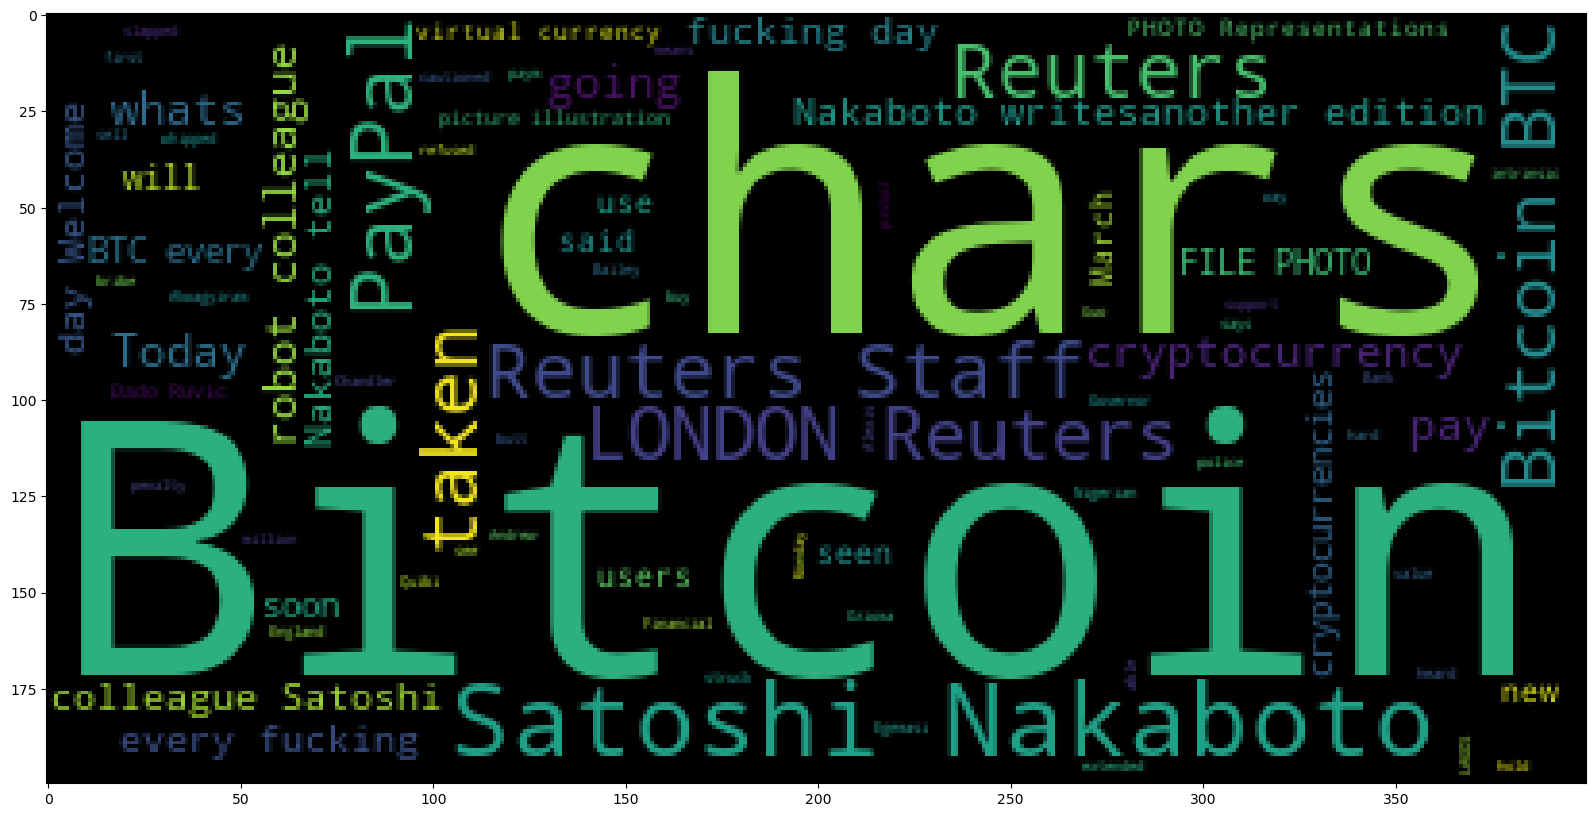

In [24]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_big_string)
plt.imshow(btc_wc)

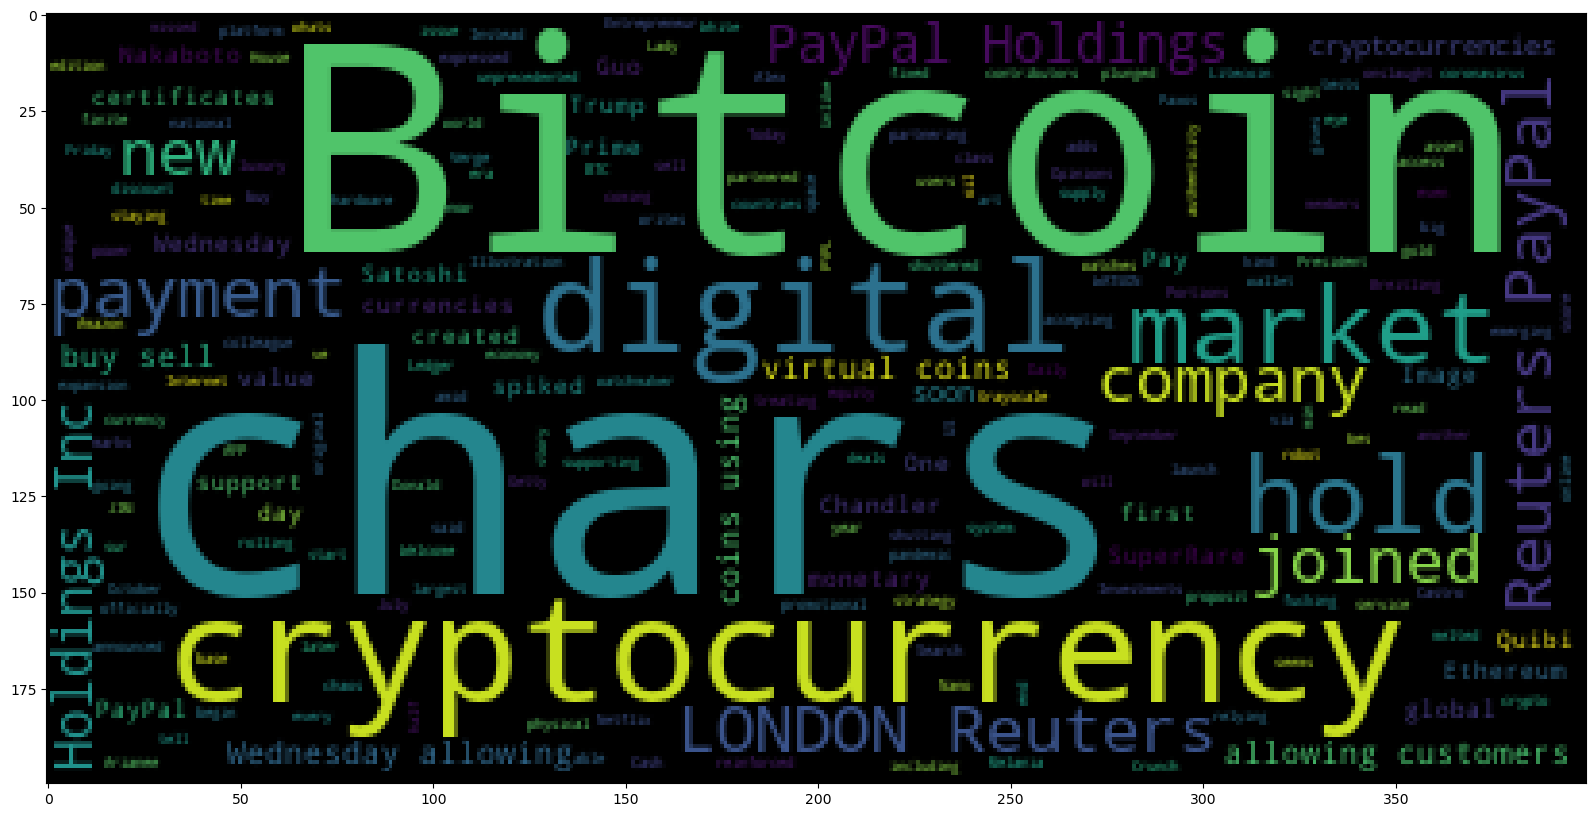

In [25]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_big_string)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [38]:
# Concatenate all of the bitcoin text together
btc_doc = nlp(btc_big_string)
btc_doc

PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.
Pay… [+2069 chars] PayPal is rolling out cryptocurrency support later this year
Illustration by Alex Castro / The Verge
PayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars] The Financial Crimes Enforcement Network (FinCEN) has assessed a civil penalty of $60 million from Larry Dean Harmon, the founder of bitcoin mixers Helix and Coin Ninja. The penalty is the first of i… [+1806 chars] Image copyrightChandler GuoImage caption
 Chandler Guo at one of his cryptocurrency mines
Chandler Guo was a pioneer in cryptocurrency, the digital currencies that can be created and used independe… [+5995 chars] Cryptocurrencies like bitcoin are a fun way to skirt money-laundering laws and pay for drugs, but, according to reporting by Reuters, it appears 

In [44]:
# Run the NER processor on all of the text

# Add a title to the document

# Render the visualization
btc_ner = displacy.render(btc_doc, style='ent')
btc_ner

In [91]:
 # Get Bitcoin entities
btc_entities = [ent.text for ent in btc_doc.ents]

# List all Bitcoin Entities
for ent in btc_entities:
    print(ent)

PayPal
Paxos
PayPal
U.S.
PayPal
later this year
Alex Castro
The Verge

Wednesday
first
The Financial Crimes Enforcement Network
$60 million
Larry Dean Harmon
Helix
Coin Ninja
first
GuoImage
Chandler Guo
one
Chandler Guo
Reuters
Beanie Babies
World News
Alexis Akwagyiram
Reuters
Ozioma Egemasi
Nigerian
Reuters
Ozioma Egemasi
Nigerian
PayPal
305 million
Bitcoin
Angela Lang
Reuters
Bitcoin
March 13, 2020
Dado Ruvic
LONDON
Reuters
Bitcoin
Reuters
Bitcoin
March 13, 2020
REUTERS/
Dado Ruvic/File Photo
LONDON
Reuters
Bitcoin
Reuters
Bitcoin
March 13, 2020
Dado Ruvic
LONDON
Reuters
Bitcoin
Satoshi Nakaboto
Bitcoin
Bitcoin
Today
Satoshi Nakaboto
Bitcoin
Reuters
LONDON
Reuters
Bank of England
Andrew Bailey
Monday
Bitcoin
Reuters
LONDON
Reuters
Bank of England
Andrew Bailey
Monday
Bitcoin
Quibi
PayPal
Netflix
Daily Crunch
October 21, 2020
Satoshi Nakaboto
Bitcoin
Bitcoin
Today
Satoshi Nakaboto
Bitcoin
Satoshi Nakaboto
Bitcoin
Bitcoin
Today
Satoshi Nakaboto
Bitcoin
Reuters
LONDON
Reuters
Britains


---

## Ethereum NER

In [85]:
# Concatenate all of the Ethereum text together
eth_doc = nlp(eth_big_string)
eth_doc

PayPal has partnered with cryptocurrency company Paxos to launch a new service. PayPal users in the U.S. will soon be able to buy, hold and sell cryptocurrencies. More countries are coming soon.
Pay… [+2069 chars] Breitling is partnering with Arianee to issue a new kind of certificates of authenticity for its luxury watches. Instead of relying on physical certificates, the watchmaker gives you a unique digital… [+1593 chars] September
30, 2020
8 min read
Opinions expressed by Entrepreneur contributors are their own.
If you’ve had even half an eye on the cryptocurrency space in 2020, then you can’t have missed the sur… [+8935 chars] PayPal is rolling out cryptocurrency support later this year
Illustration by Alex Castro / The Verge
PayPal on Wednesday announced it would begin supporting cryptocurrencies for the first time, all… [+2172 chars] Portions of the global economy melted down in 2020, but an emerging asset class seems to have reinforced its staying power amid the chaos.
Grayscal

In [86]:
# Run the NER processor on all of the text

# Add a title to the document

# Render the visualization
eth_ner = displacy.render(eth_doc, style='ent')
eth_ner

In [92]:
 # Get Ethereum entities
eth_entities = [ent.text for ent in eth_doc.ents]

# List all Ethereum Entities
for ent in eth_entities:
    print(ent)

PayPal
Paxos
PayPal
U.S.
Arianee
September
30
2020
8
half
2020
PayPal
later this year
Alex Castro
The Verge

Wednesday
first
2020
Grayscale Investments
Quibi
PayPal
Netflix
Daily Crunch
October 21, 2020
Satoshi Nakaboto
Bitcoin
Bitcoin
Today
Satoshi Nakaboto
Bitcoin
Amazon
Prime Day
One
the Ledger Nano S
39.99
LONDON
Reuters
PayPal Holdings Inc
Wednesday
U.S.
LONDON
Reuters
PayPal Holdings Inc
Wednesday
U.S.
LONDON
Reuters
PayPal Holdings Inc
Wednesday
U.S.
LONDON
Reuters
PayPal Holdings Inc
Wednesday
U.S.
US
Donald Trump
First
Lady Melania Trump
the White House
July 7, 2020
JIM WATSON
Getty Images
Friday
Bitcoin
Wednesday
PayPal
Bitcoin
Ethereum
Bitcoin Cash
Litecoin
Bitcoin
Bitcoins
SuperRare
SuperRare
GuoImage
Chandler Guo
one
Chandler Guo
